In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

#VIPAX-WAAA-VQJS
#VIPAX-ATWO-EPOY
#VIPAX-ANAP-TTGK
#VIPAX-LAAK-TYQM
#VIPAX-FPDS-RFDR

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
test_df= pd.read_csv('test.csv')
test_df.head(5)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [6]:
train_df.isnull().any()

Dates         False
Category      False
Descript      False
DayOfWeek     False
PdDistrict    False
Resolution    False
Address       False
X             False
Y             False
dtype: bool

In [7]:
test_df.isnull().any()

Id            False
Dates         False
DayOfWeek     False
PdDistrict    False
Address       False
X             False
Y             False
dtype: bool

In [8]:
train_df = train_df.drop('Resolution', axis=1)
train_df.sample(1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y
542863,2007-09-17 13:00:00,VEHICLE THEFT,STOLEN TRUCK,Monday,INGLESIDE,200 Block of SCHWERIN ST,-122.411527,37.710368


In [9]:
train_df.rename(columns={'Dates':'DateTime'},inplace=True)
test_df.rename(columns={'Dates':'DateTime'},inplace=True)

In [10]:
train_df.DateTime = pd.to_datetime(train_df.DateTime)
test_df.DateTime = pd.to_datetime(test_df.DateTime)
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DateTime    878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Address     878049 non-null  object        
 6   X           878049 non-null  float64       
 7   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 53.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Id          884262 non-null  int64         
 1   DateTime    884262 non-null  datetime64[ns]
 2   DayOfWeek   88426

In [11]:
train_df['IsDay'] = 0
train_df.loc[ (train_df.DateTime.dt.hour > 6) & (train_df.DateTime.dt.hour < 20), 'IsDay' ] = 1
test_df['IsDay'] = 0
test_df.loc[ (test_df.DateTime.dt.hour > 6) & (test_df.DateTime.dt.hour < 20), 'IsDay' ] = 1


In [12]:
train_df['Hour'] = train_df.DateTime.dt.hour
train_df['Month'] = train_df.DateTime.dt.month
train_df['Year'] = train_df.DateTime.dt.year
train_df['Year'] = train_df['Year'] - 2000 # The Algorithm doesn't know the difference. It's just easier to work like that

test_df['Hour'] = test_df.DateTime.dt.hour
test_df['Month'] = test_df.DateTime.dt.month
test_df['Year'] = test_df.DateTime.dt.year
test_df['Year'] = test_df['Year'] - 2000 # The Algorithm doesn't know the difference. It's just easier to work like that

train_df.sample(1)

,DateTime,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,IsDay,Hour,Month,Year
552195,2007-07-27 13:14:00,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Friday,INGLESIDE,0 Block of BLYTHDALE AV,-122.41772,37.710661,1,13,7,7


In [13]:
days_to_int_dic = {
        'Monday': 1,
        'Tuesday': 2,
        'Wednesday': 3,
        'Thursday': 4,
        'Friday': 5,
        'Saturday': 6,
        'Sunday': 7,
}
train_df['DayOfWeek'] = train_df['DayOfWeek'].map(days_to_int_dic)
test_df ['DayOfWeek'] = test_df ['DayOfWeek'].map(days_to_int_dic)

train_df.DayOfWeek.unique()

array([3, 2, 1, 7, 6, 5, 4], dtype=int64)

In [14]:
train_df['Year'] = train_df.DateTime.dt.year
train_df['Month'] = train_df.DateTime.dt.month
train_df['Hour'] = train_df.DateTime.dt.hour
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DateTime    878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  int64         
 4   PdDistrict  878049 non-null  object        
 5   Address     878049 non-null  object        
 6   X           878049 non-null  float64       
 7   Y           878049 non-null  float64       
 8   IsDay       878049 non-null  int64         
 9   Hour        878049 non-null  int64         
 10  Month       878049 non-null  int64         
 11  Year        878049 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 80.4+ MB


In [15]:
train_df.DateTime.min(), train_df.DateTime.max()

(Timestamp('2003-01-06 00:01:00'), Timestamp('2015-05-13 23:53:00'))

In [16]:
train_df['MonthE'] = np.sin((train_df.Month*2*np.pi)/12)
train_df['MonthE'] = np.cos((train_df.Month*2*np.pi)/12)

In [17]:
train_df['DayOfWeekE'] = train_df.DayOfWeek.map({
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
})

train_df['DayOfWeekE'] = np.sin((train_df.DayOfWeekE*2*np.pi)/7)
train_df['DayOfWeekE'] = np.cos((train_df.DayOfWeekE*2*np.pi)/7)

In [18]:
train_df['HourE'] = np.sin((train_df.Hour*2*np.pi)/24)
train_df['HourE'] = np.cos((train_df.Hour*2*np.pi)/24)

In [19]:
train_df = pd.get_dummies(train_df, columns=['PdDistrict'])
test_df  = pd.get_dummies(test_df,  columns=['PdDistrict'])
train_df.sample(2)

,DateTime,Category,Descript,DayOfWeek,Address,X,Y,IsDay,Hour,Month,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
758839,2004-08-05 05:00:00,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,4,2000 Block of GOLDEN GATE AV,-122.444358,37.778040,0,5,8,...,0,0,0,0,0,1,0,0,0,0
118556,2013-10-14 16:50:00,ROBBERY,ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE,1,700 Block of MARKET ST,-122.405295,37.786307,1,16,10,...,0,0,0,0,0,0,0,1,0,0


In [20]:
from sklearn.preprocessing import LabelEncoder

cat_le = LabelEncoder()
train_df['CategoryInt'] = pd.Series(cat_le.fit_transform(train_df.Category))
train_df.sample(5)

,DateTime,Category,Descript,DayOfWeek,Address,X,Y,IsDay,Hour,Month,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,CategoryInt
281767,2011-07-12 13:07:00,NON-CRIMINAL,"CIVIL SIDEWALKS, CITATION",2,16TH ST / VALENCIA ST,-122.421886,37.764918,1,13,7,...,0,0,1,0,0,0,0,0,0,20
39313,2014-11-01 06:10:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",6,1400 Block of DIVISADERO ST,-122.439275,37.782906,0,6,11,...,0,0,0,0,1,0,0,0,0,20
273323,2011-08-26 14:54:00,OTHER OFFENSES,POSSESSION OF BURGLARY TOOLS,5,0 Block of OFARRELL ST,-122.405895,37.786734,1,14,8,...,0,0,0,0,0,0,0,0,1,21
515605,2008-02-07 12:10:00,ROBBERY,ROBBERY OF A RESIDENCE WITH BODILY FORCE,4,1300 Block of JACKSON ST,-122.417822,37.794549,1,12,2,...,1,0,0,0,0,0,0,0,0,25
758586,2004-08-05 20:25:00,BURGLARY,"BURGLARY, HOT PROWL, ATTEMPTED FORCIBLE ENTRY",4,0 Block of DOUBLEROCK ST,-122.387775,37.720466,0,20,8,...,0,0,0,0,0,0,0,0,0,4


In [21]:
train_df['InIntersection'] = 1
train_df.loc[train_df.Address.str.contains('Block'), 'InIntersection'] = 0

test_df['InIntersection'] = 1
test_df.loc[test_df.Address.str.contains('Block'), 'InIntersection'] = 0

In [22]:
train_df.head(5)

,DateTime,Category,Descript,DayOfWeek,Address,X,Y,IsDay,Hour,Month,...,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,CategoryInt,InIntersection
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,3,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,...,0,0,1,0,0,0,0,0,37,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,...,0,0,1,0,0,0,0,0,21,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,23,5,...,0,0,1,0,0,0,0,0,21,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,1500 Block of LOMBARD ST,-122.426995,37.800873,0,23,5,...,0,0,1,0,0,0,0,0,16,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,100 Block of BRODERICK ST,-122.438738,37.771541,0,23,5,...,0,0,0,1,0,0,0,0,16,0


In [23]:
train_df.columns

Index(['DateTime', 'Category', 'Descript', 'DayOfWeek', 'Address', 'X', 'Y',
       'IsDay', 'Hour', 'Month', 'Year', 'MonthE', 'DayOfWeekE', 'HourE',
       'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
       'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
       'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL',
       'PdDistrict_TENDERLOIN', 'CategoryInt', 'InIntersection'],
      dtype='object')

In [24]:
feature_cols = ['X', 'Y', 'IsDay', 'DayOfWeek', 'Month', 'Hour', 'Year', 'InIntersection',
                'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
                'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
                'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']
target_col = 'CategoryInt'

train_x = train_df[feature_cols]
train_y = train_df[target_col]

test_ids = test_df['Id']
test_x = test_df[feature_cols]


In [25]:
as_per_year = train_df.groupby('Year')['Descript'].count()
as_per_year

Year
2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: Descript, dtype: int64

Text(0, 0.5, 'Count of Crimes')

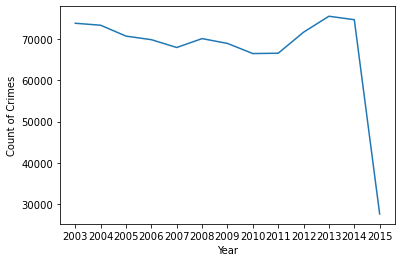

In [26]:
ax = as_per_year.plot(kind='line', xticks=as_per_year.index.values)
ax.set_ylabel('Count of Crimes')

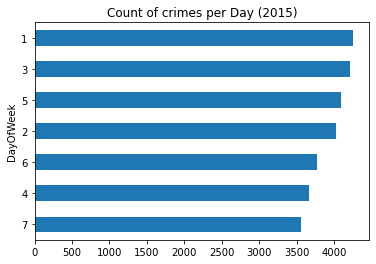

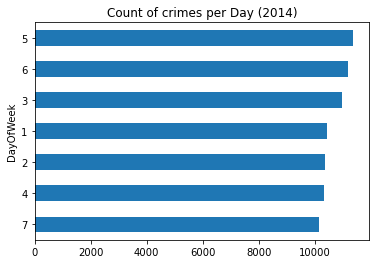

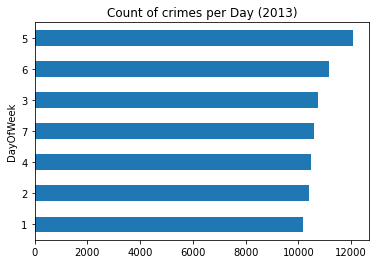

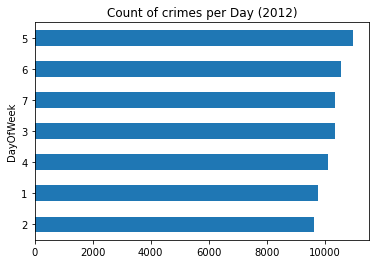

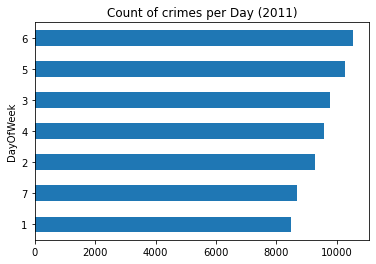

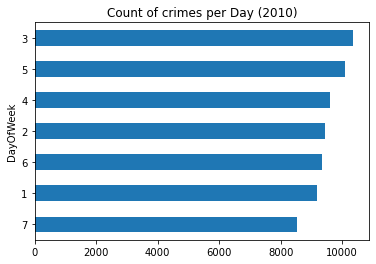

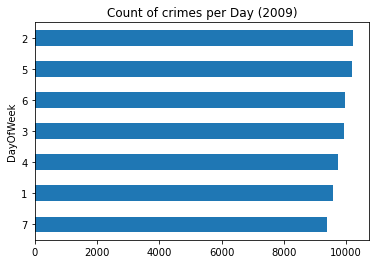

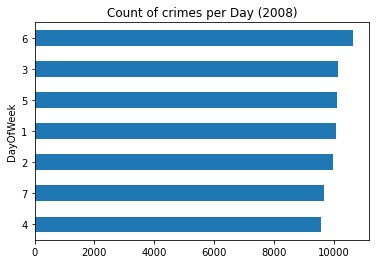

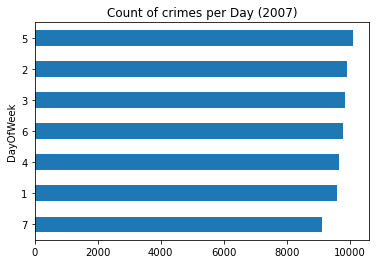

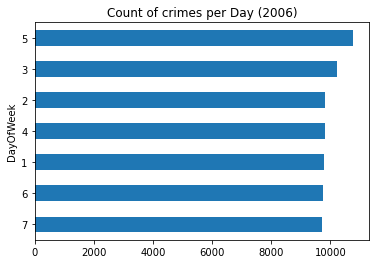

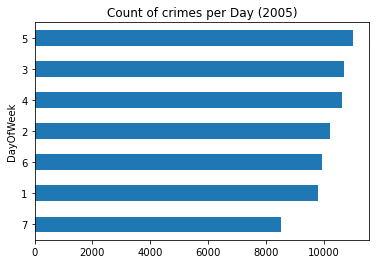

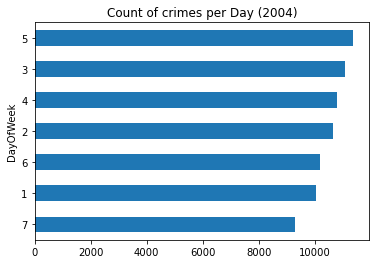

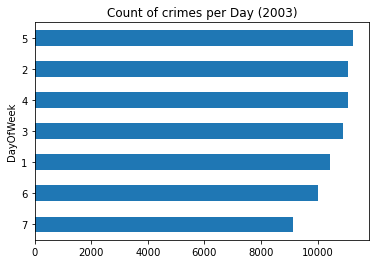

In [27]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('DayOfWeek')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per Day ({y})', fig=(16,5))
    plt.show()

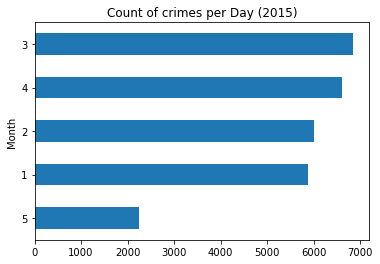

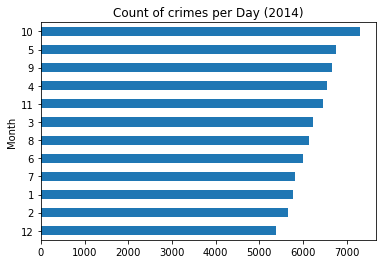

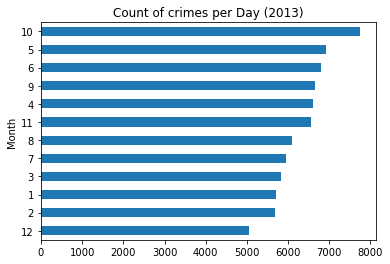

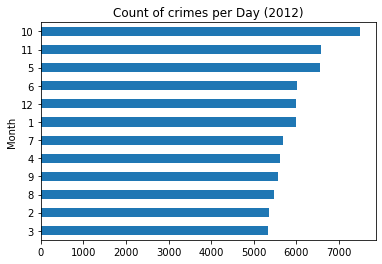

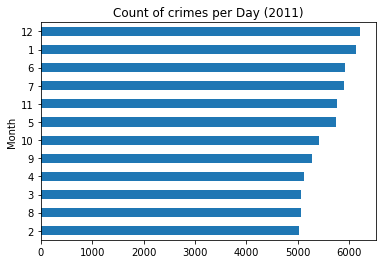

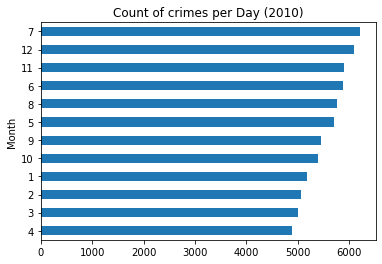

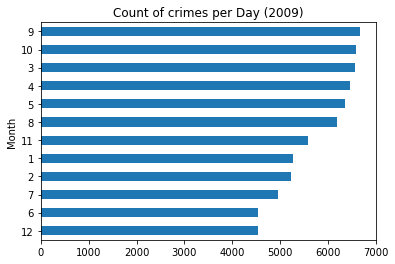

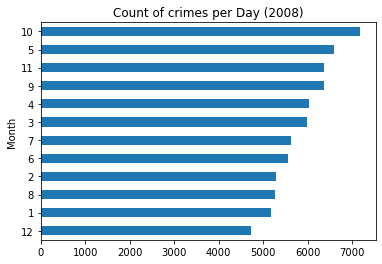

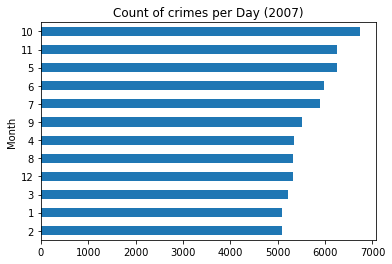

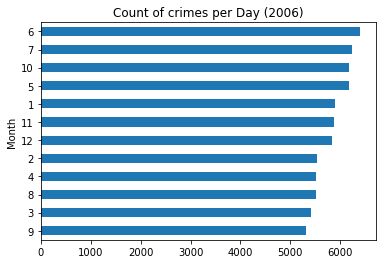

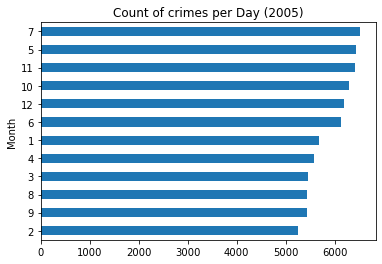

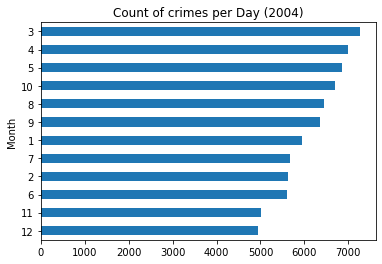

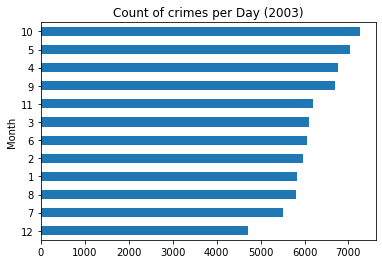

In [28]:
for y in train_df.Year.unique():
    train_df[train_df['Year'] == y].groupby('Month')['Descript'].count().sort_values().plot(kind='barh', title=f'Count of crimes per Day ({y})', fig=(16,5))
    plt.show()

In [29]:
train_df['IsDay']  = train_df.Hour.apply(lambda x: 1 if (x > 7 and x < 20) else 0)

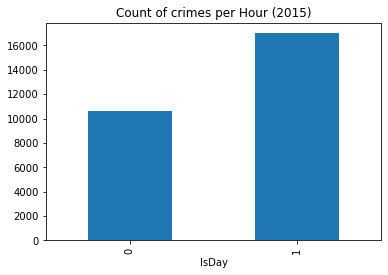

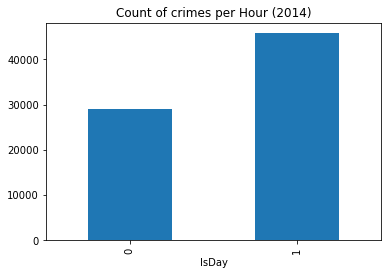

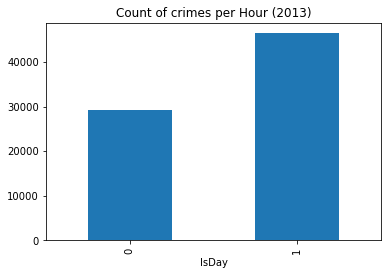

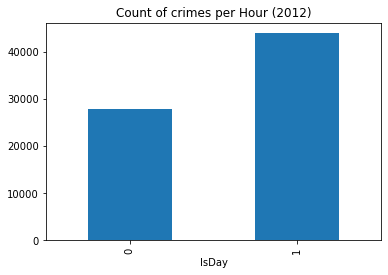

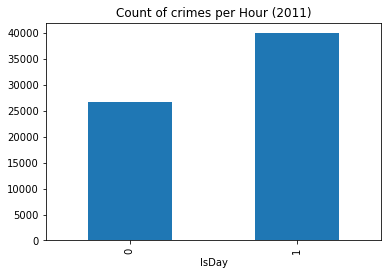

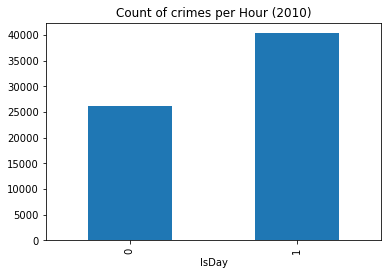

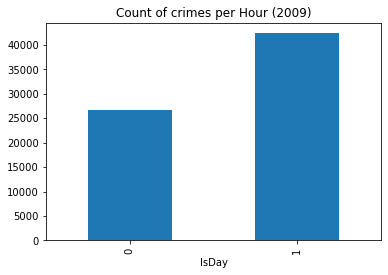

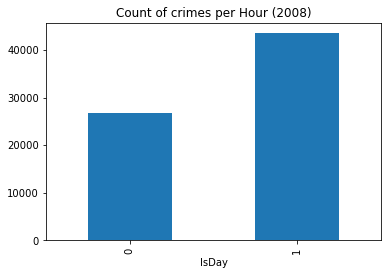

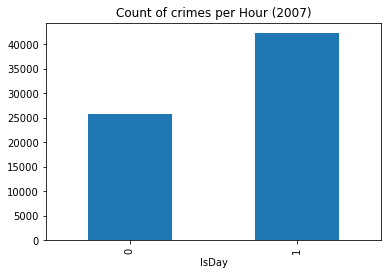

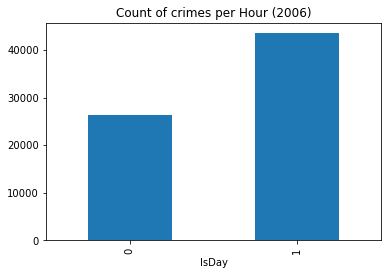

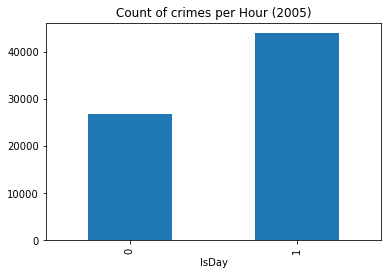

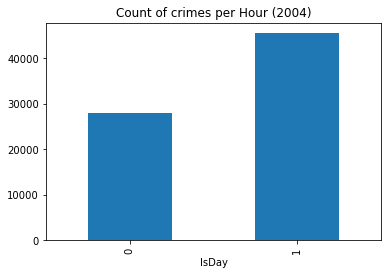

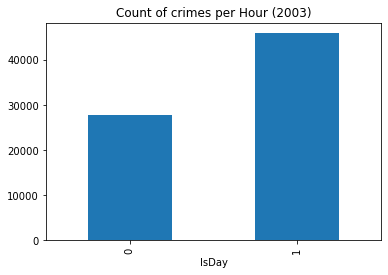

In [30]:
for y in train_df.Year.unique():
    ax = train_df[train_df['Year'] == y].groupby('IsDay')['Descript'].count().sort_values().plot(kind='bar', title=f'Count of crimes per Hour ({y})', fig=(18,7))
    plt.show()

In [31]:
train_df.head()

,DateTime,Category,Descript,DayOfWeek,Address,X,Y,IsDay,Hour,Month,...,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,CategoryInt,InIntersection
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,3,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,...,0,0,1,0,0,0,0,0,37,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,...,0,0,1,0,0,0,0,0,21,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,23,5,...,0,0,1,0,0,0,0,0,21,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,1500 Block of LOMBARD ST,-122.426995,37.800873,0,23,5,...,0,0,1,0,0,0,0,0,16,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,100 Block of BRODERICK ST,-122.438738,37.771541,0,23,5,...,0,0,0,1,0,0,0,0,16,0


In [32]:
cats = train_df.Category.unique()
cats.sort()
cats, len(cats)

(array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
        'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
        'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
        'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
        'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
        'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
        'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
        'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
        'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
        'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
        'WARRANTS', 'WEAPON LAWS'], dtype=object),
 39)

In [33]:
crimes_per_cat = (train_df.groupby('Category')['Descript'].count()/len(train_df))*100
assert int(crimes_per_cat.sum()) == 100
crimes_per_cat.sort_values(inplace=True)
crimes_per_cat

Category
TREA                            0.000683
PORNOGRAPHY/OBSCENE MAT         0.002506
GAMBLING                        0.016628
SEX OFFENSES NON FORCIBLE       0.016856
EXTORTION                       0.029156
BRIBERY                         0.032914
BAD CHECKS                      0.046239
FAMILY OFFENSES                 0.055919
SUICIDE                         0.057856
EMBEZZLEMENT                    0.132794
LOITERING                       0.139514
ARSON                           0.172314
LIQUOR LAWS                     0.216731
RUNAWAY                         0.221628
DRIVING UNDER THE INFLUENCE     0.258300
KIDNAPPING                      0.266614
RECOVERED VEHICLE               0.357383
DRUNKENNESS                     0.487444
DISORDERLY CONDUCT              0.492000
SEX OFFENSES FORCIBLE           0.499744
STOLEN PROPERTY                 0.517055
TRESPASS                        0.834350
PROSTITUTION                    0.852344
WEAPON LAWS                     0.974319
SECONDA

Text(0.5, 0, 'Crime Percentage')

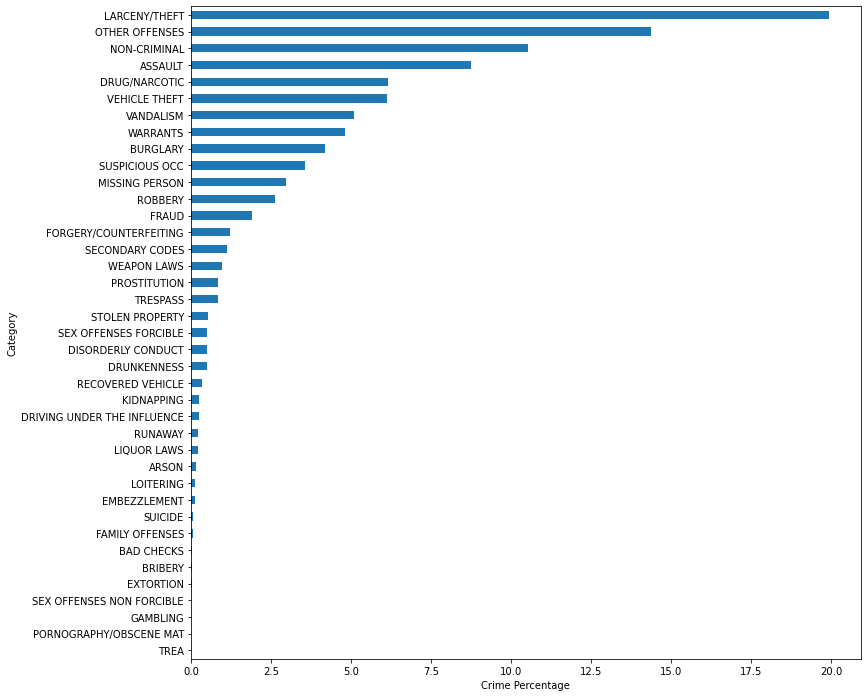

In [34]:
ax = crimes_per_cat.plot(kind='barh', figsize=(12,12) )
ax.set_xlabel('Crime Percentage')

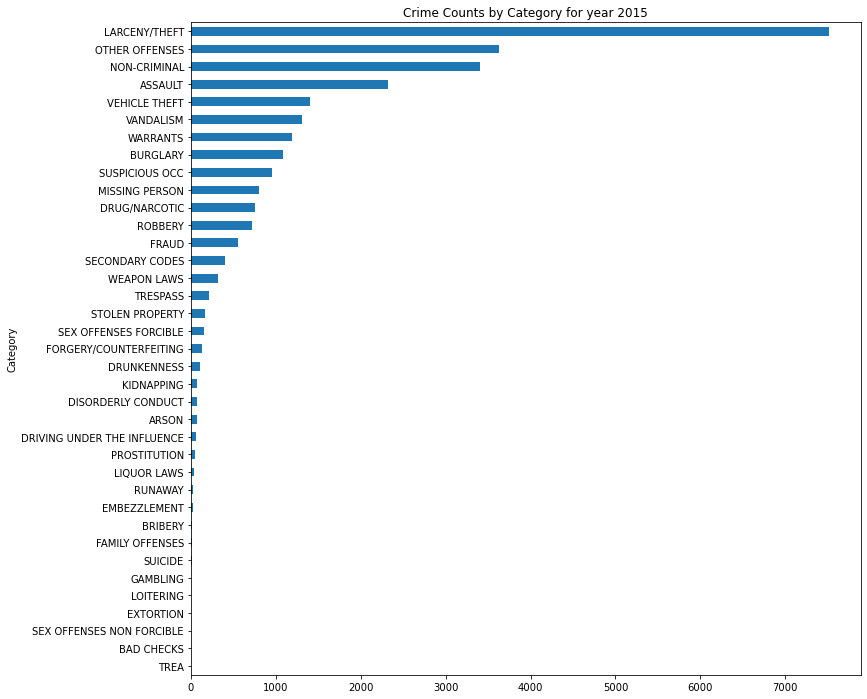

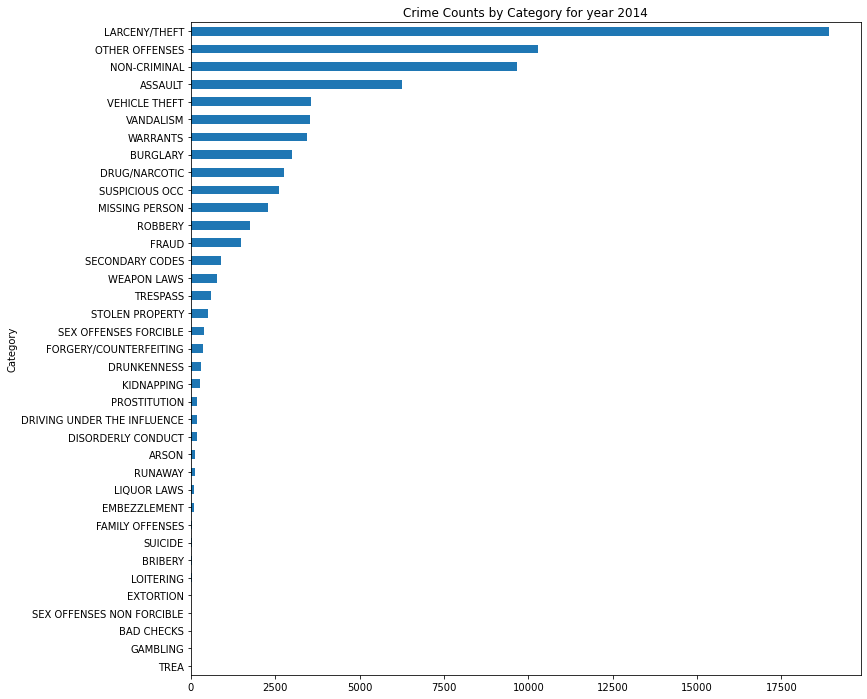

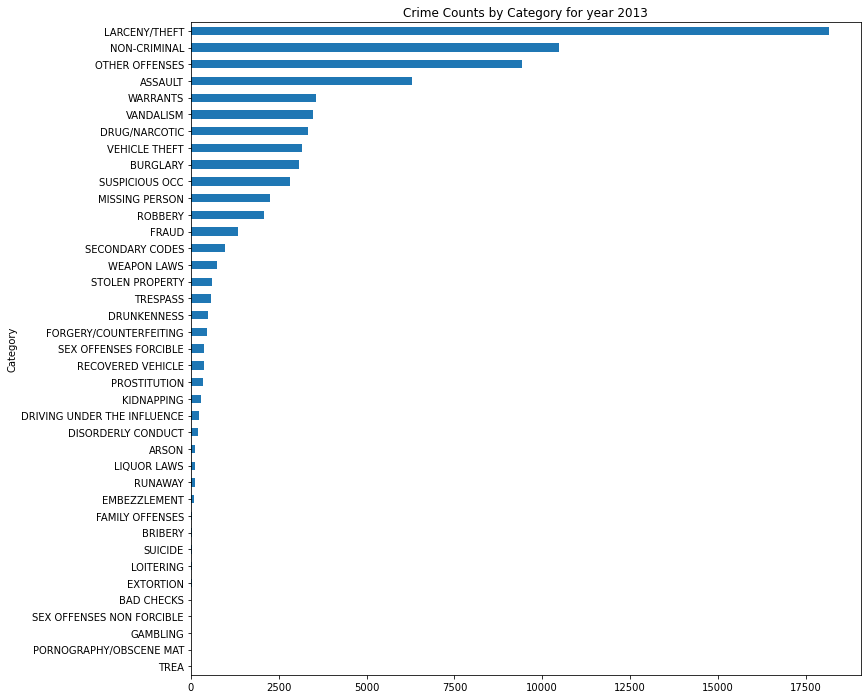

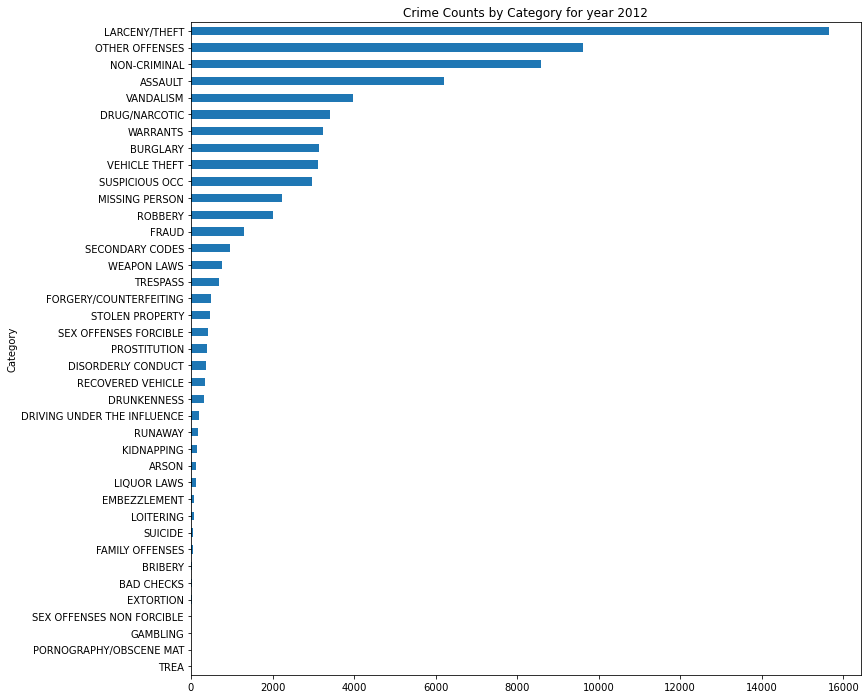

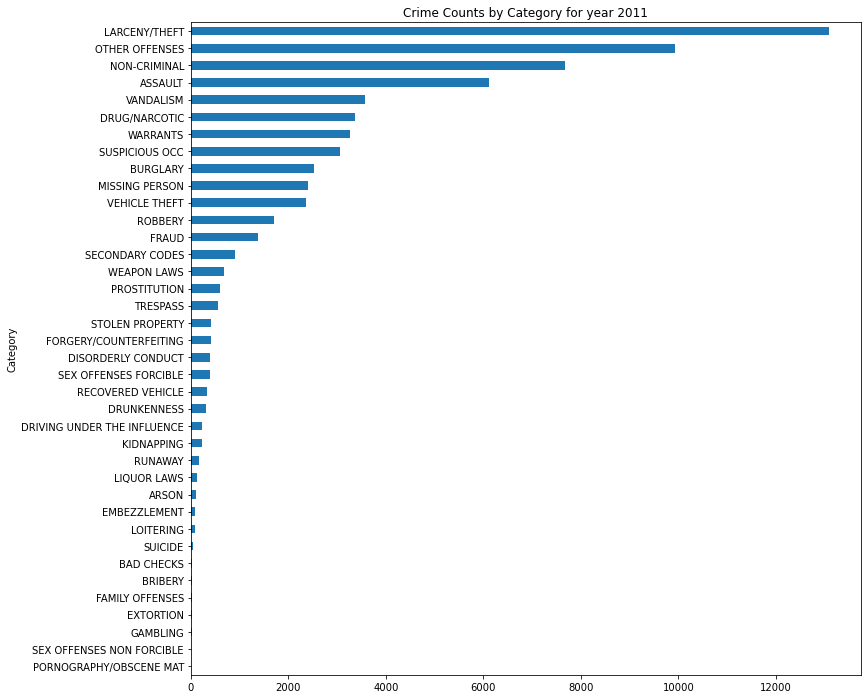

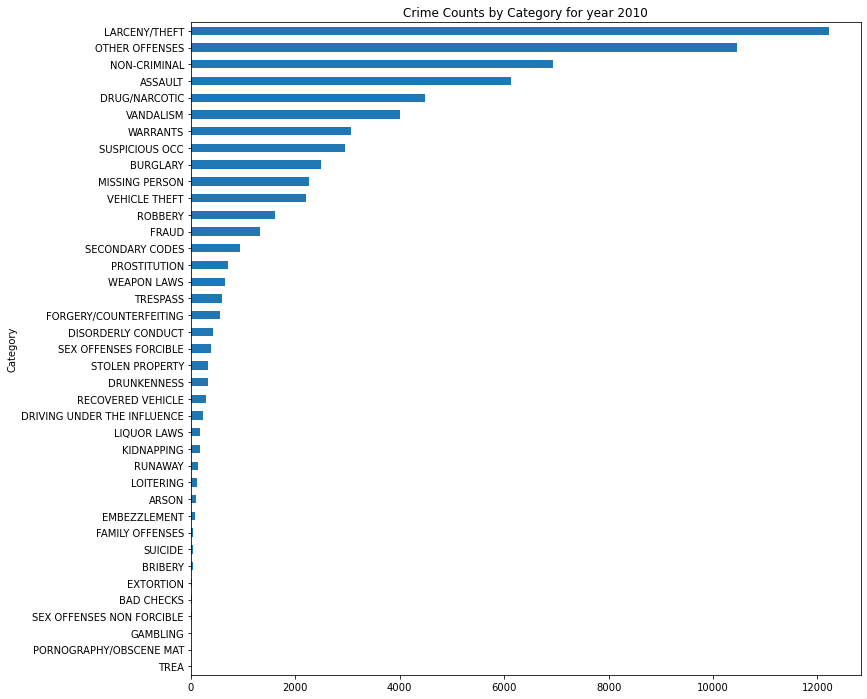

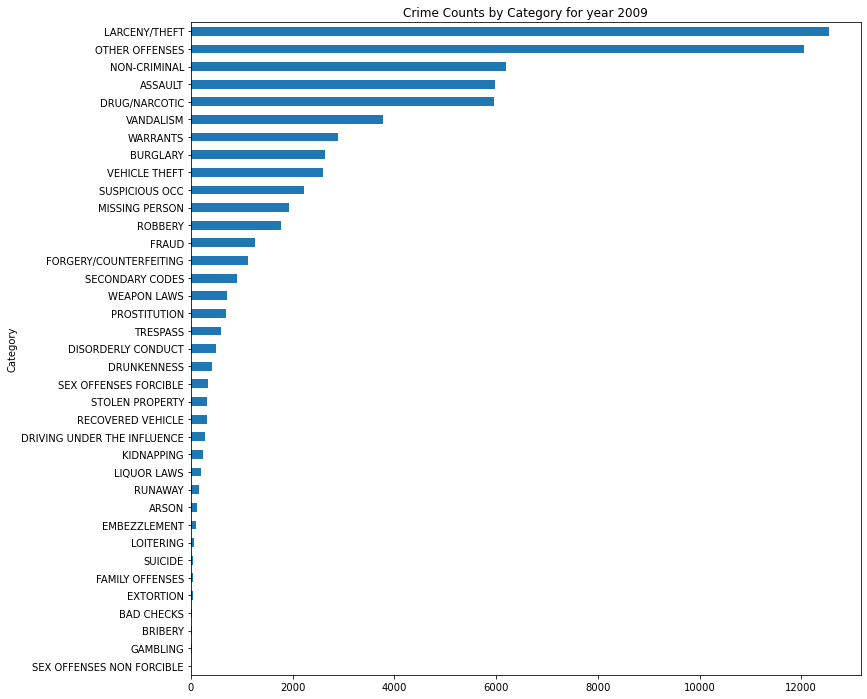

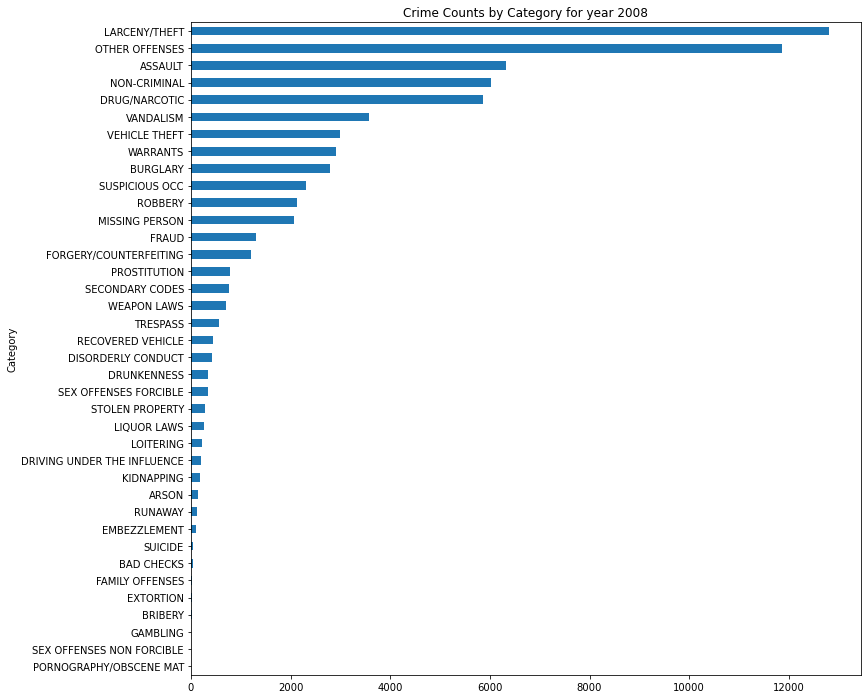

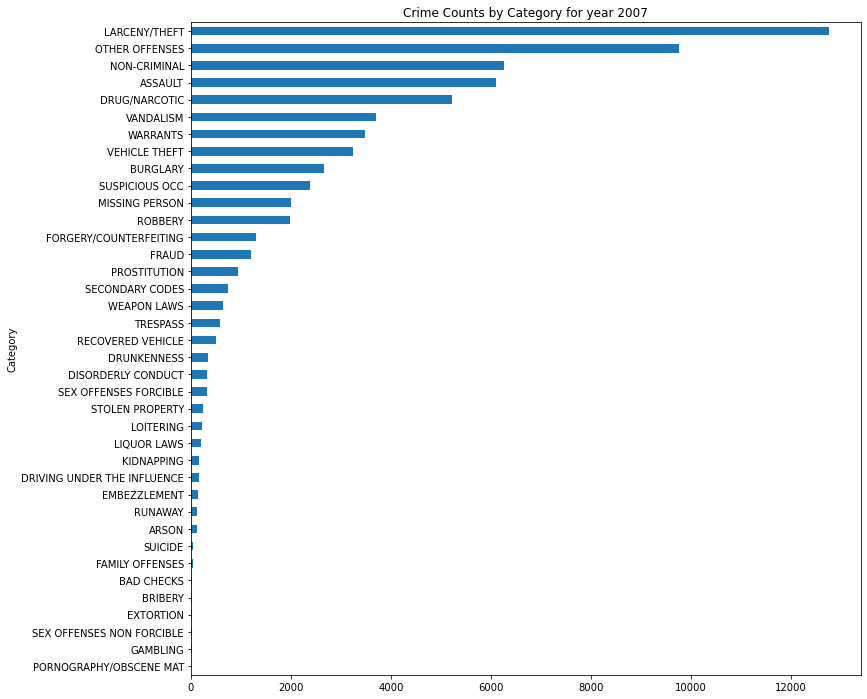

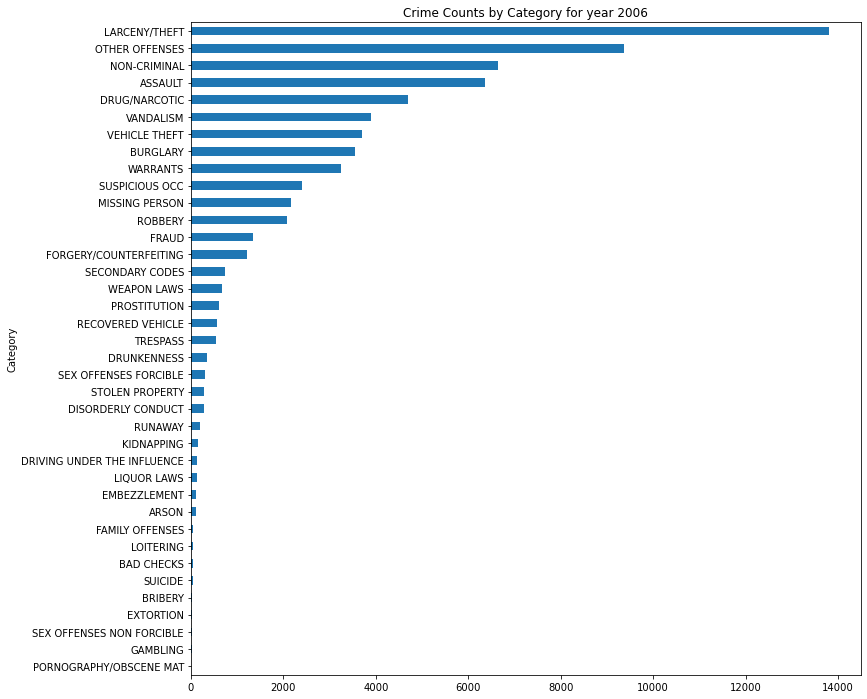

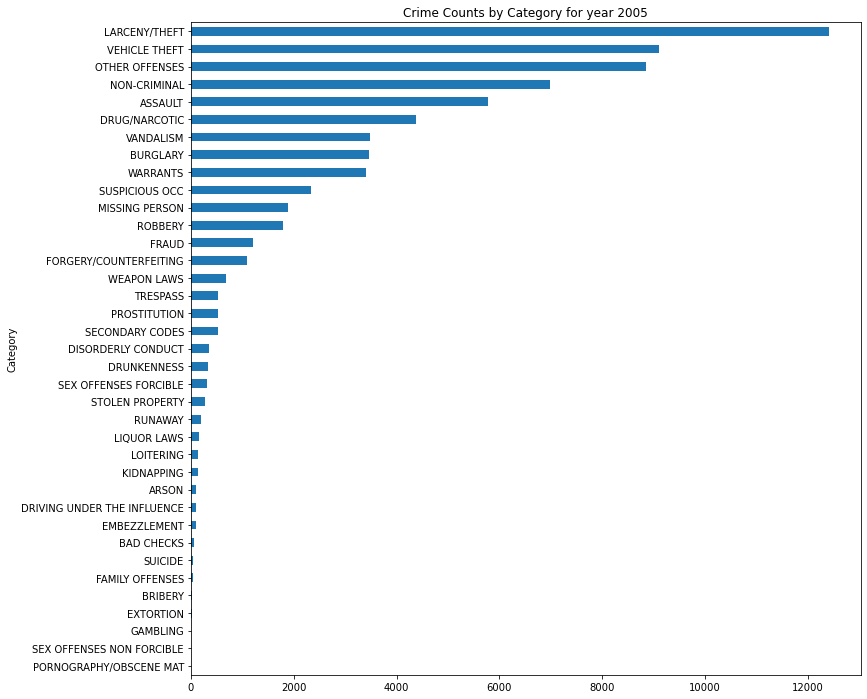

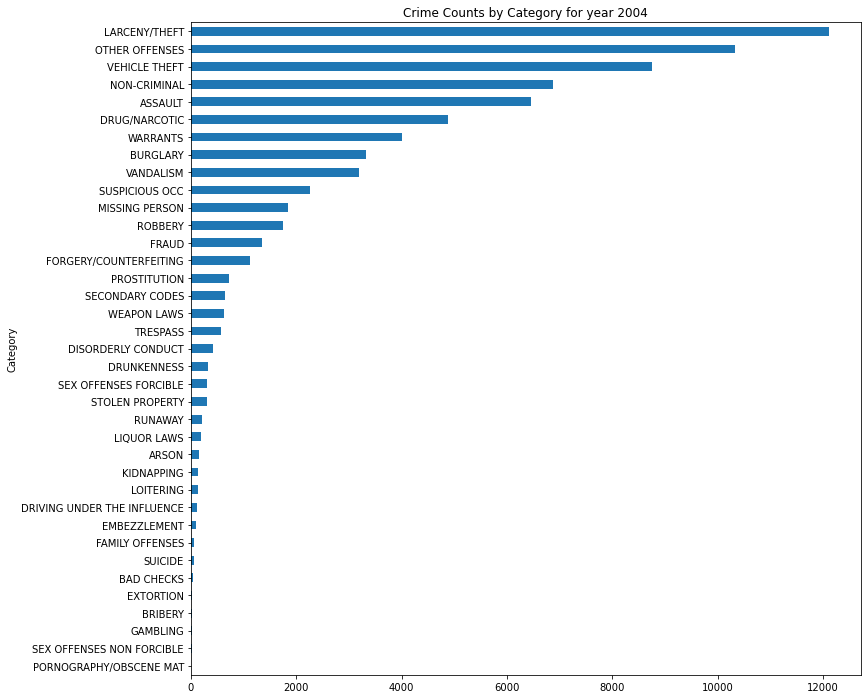

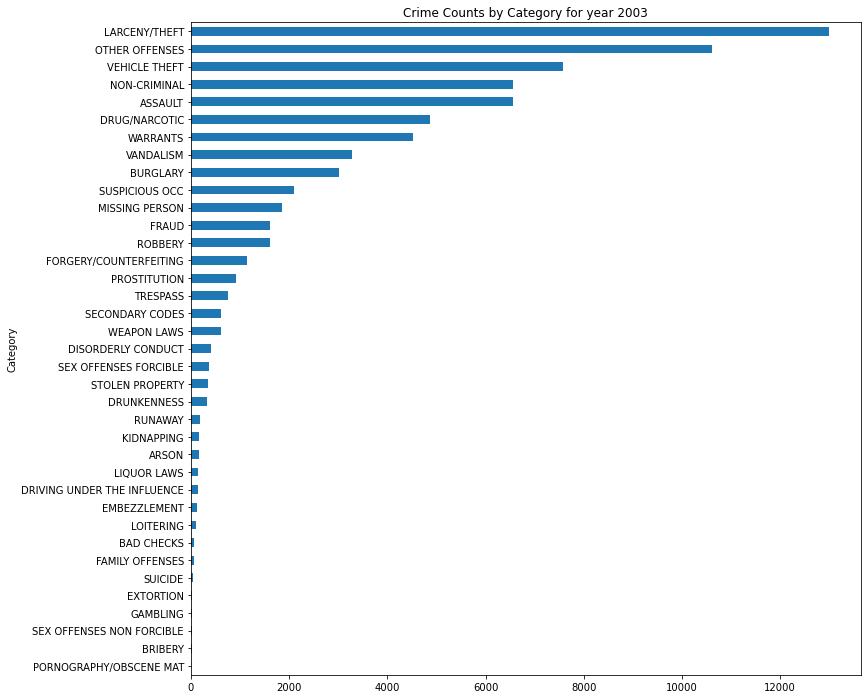

In [35]:
years = train_df.Year.unique()
for y in years:
    gb = train_df[train_df.Year == y].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(12,12), title=f'Crime Counts by Category for year {y}')
    plt.show()

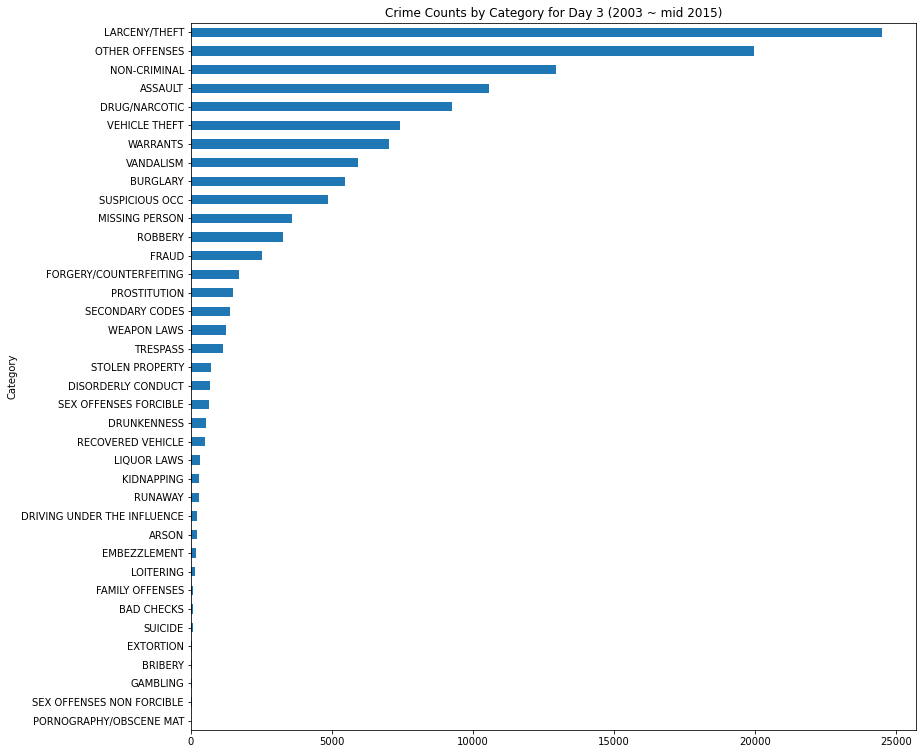

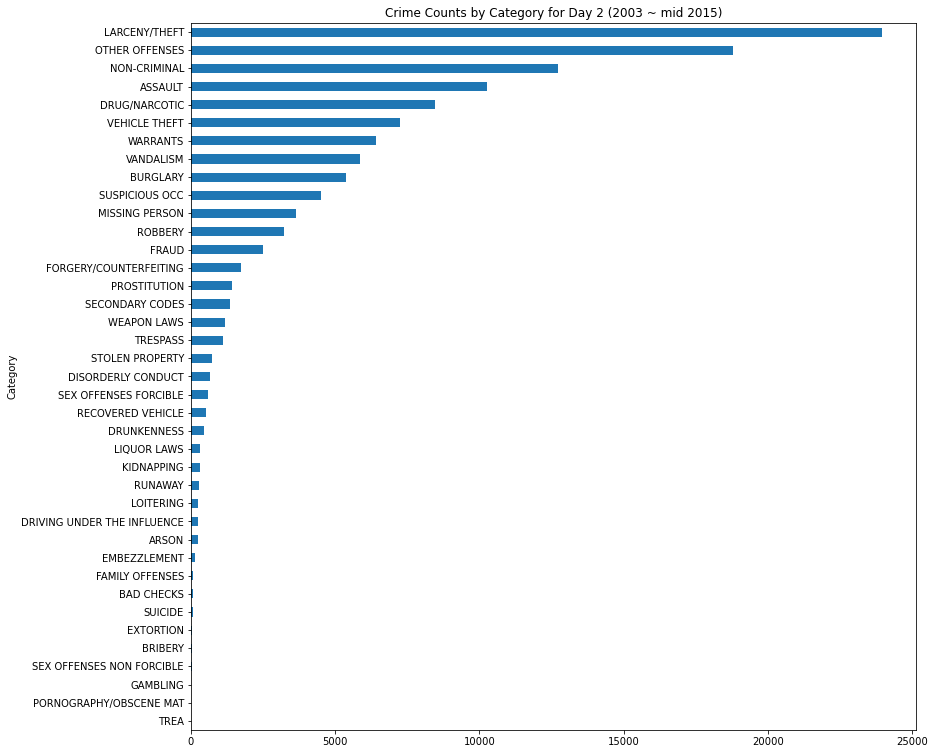

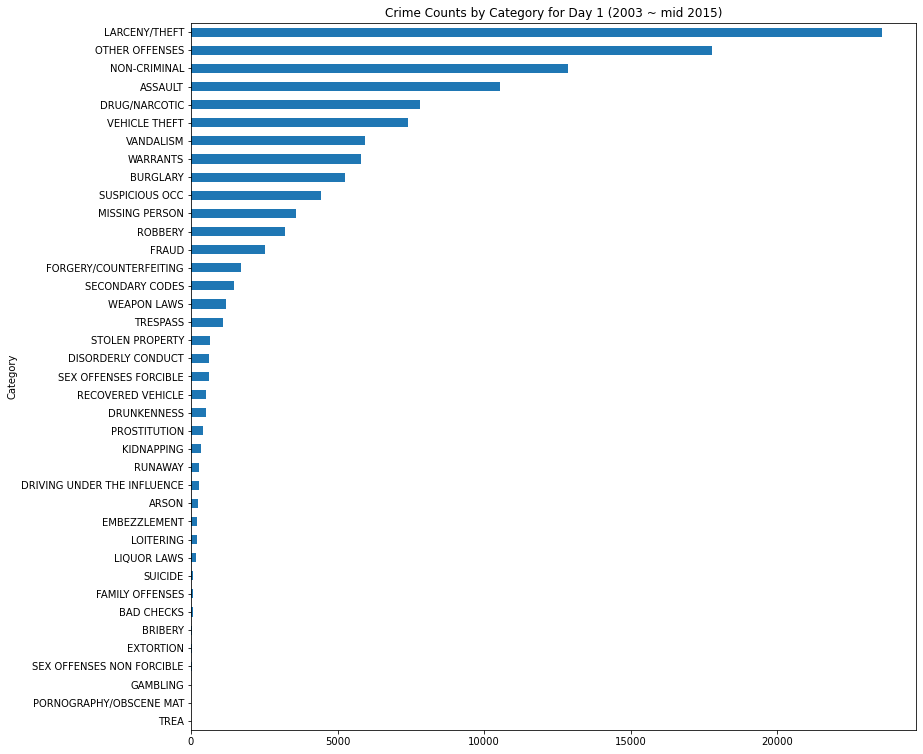

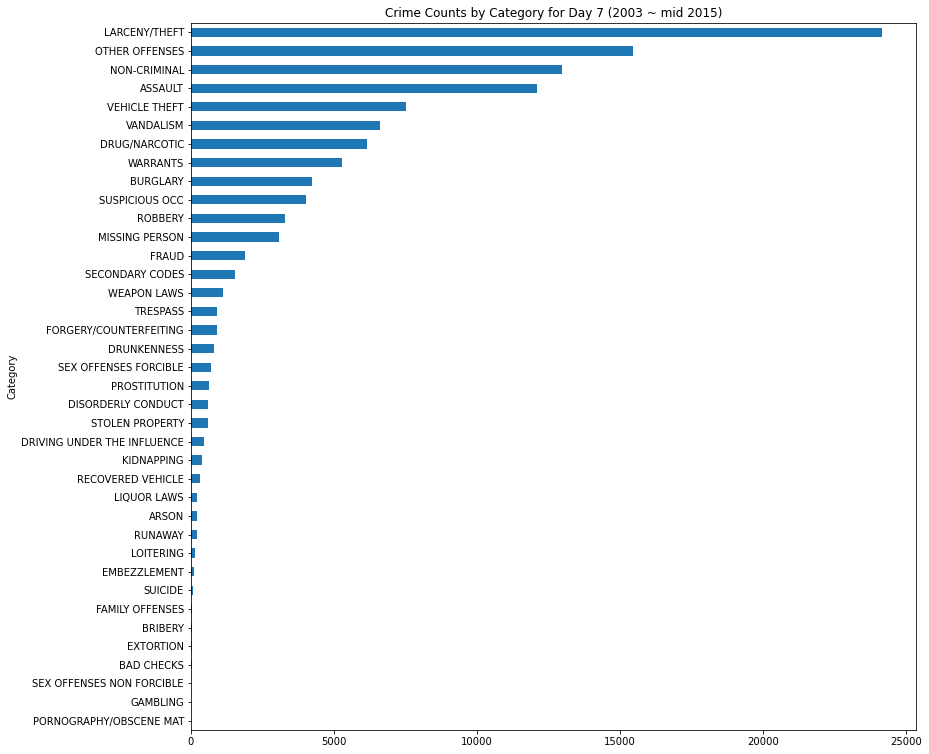

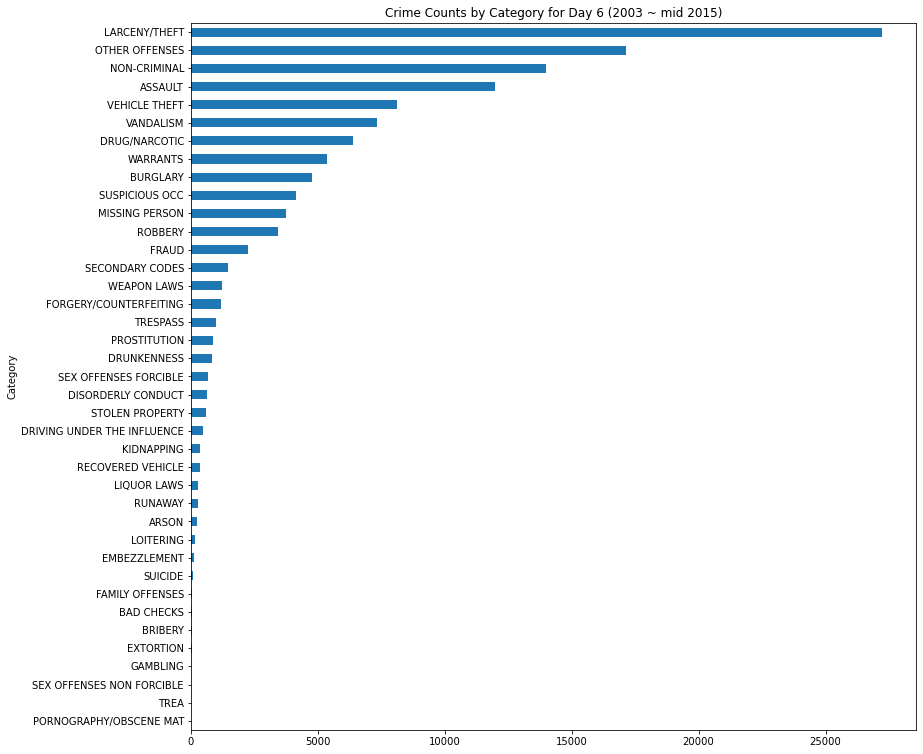

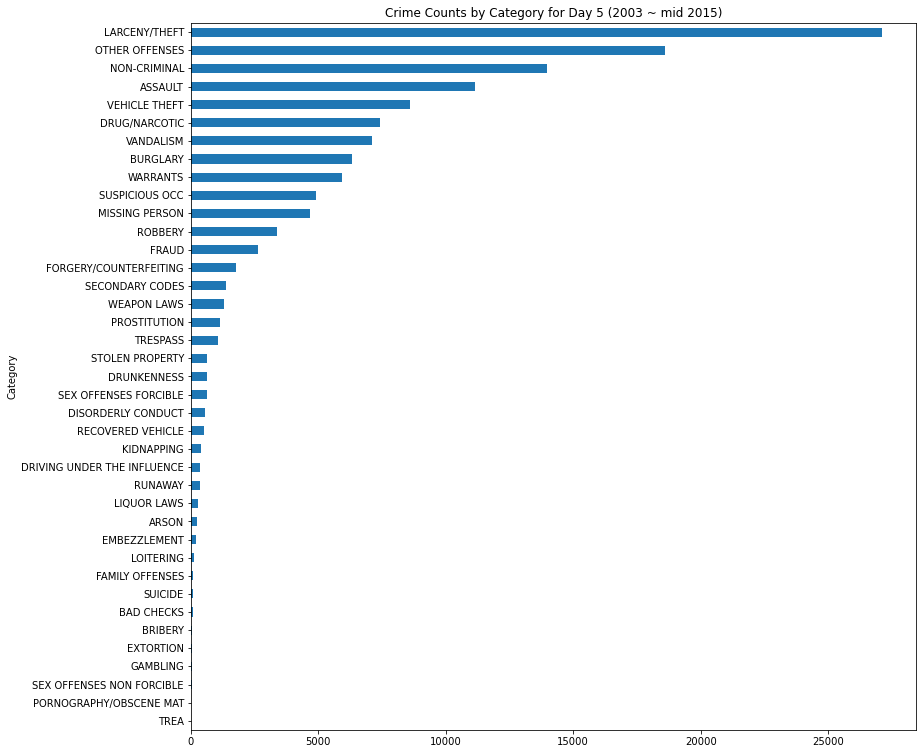

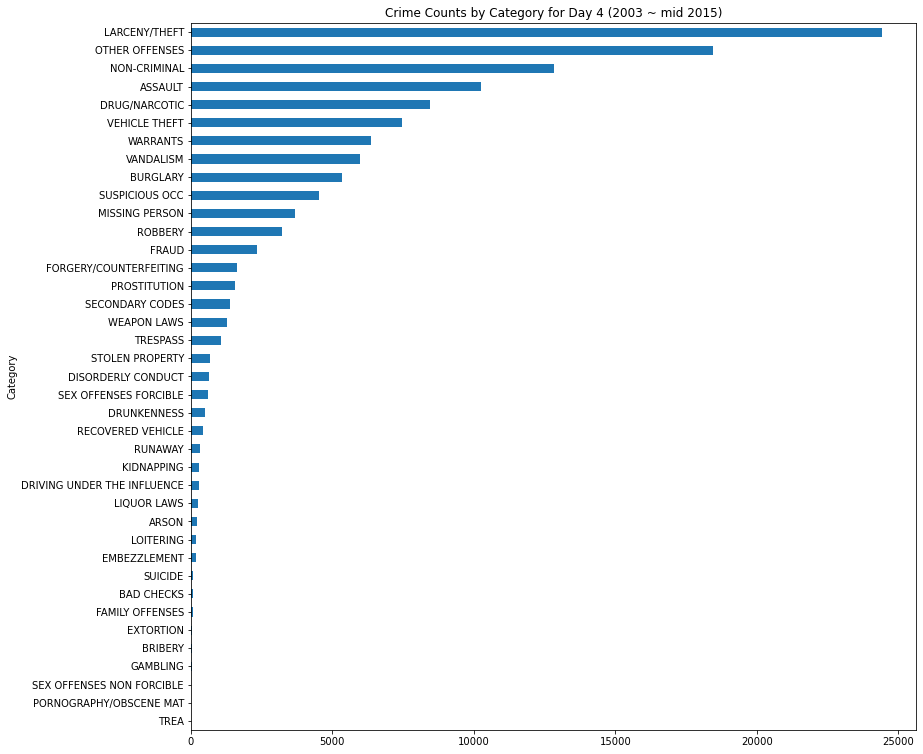

In [36]:
days_of_week = train_df.DayOfWeek.unique()
for d in days_of_week:
    gb = train_df[train_df.DayOfWeek == d].groupby('Category')['Descript'].count().sort_values()
    gb.plot(kind='barh', figsize=(13,13), title=f'Crime Counts by Category for Day {d} (2003 ~ mid 2015)')
    plt.show()

<AxesSubplot:title={'center':'Crime Categories by Day/Night (2003 ~ mid 2015)'}, ylabel='Category'>

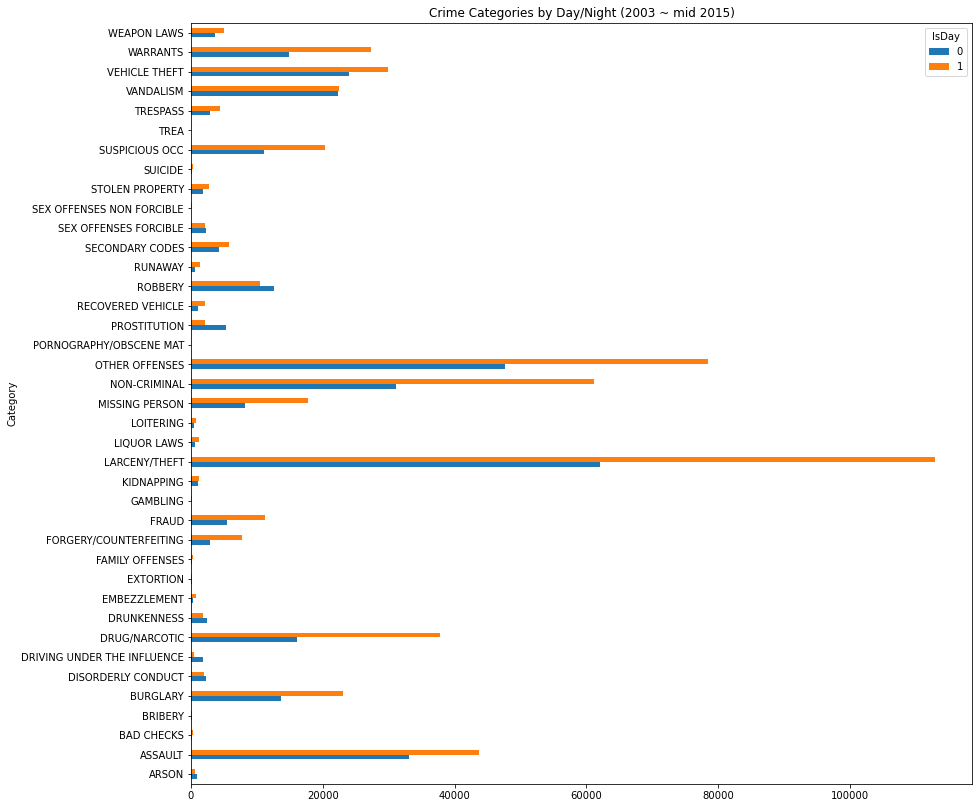

In [37]:
ct = pd.crosstab(train_df.Category, train_df.IsDay)
ct.plot(kind='barh', figsize=(14,14), title=f'Crime Categories by Day/Night (2003 ~ mid 2015)')

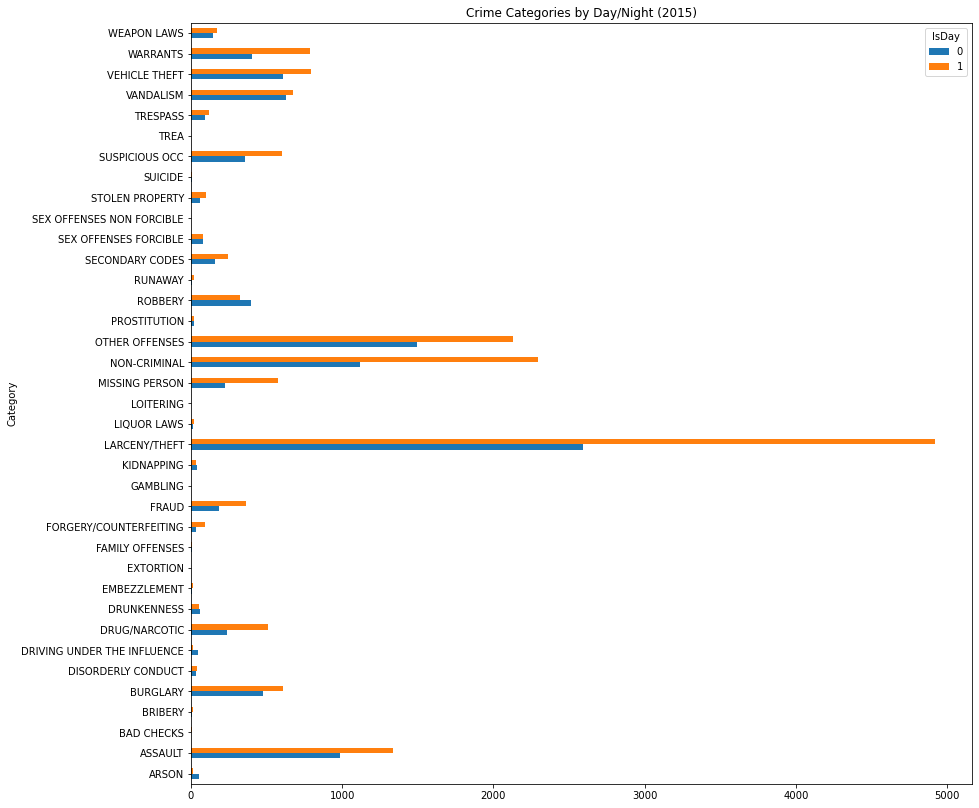

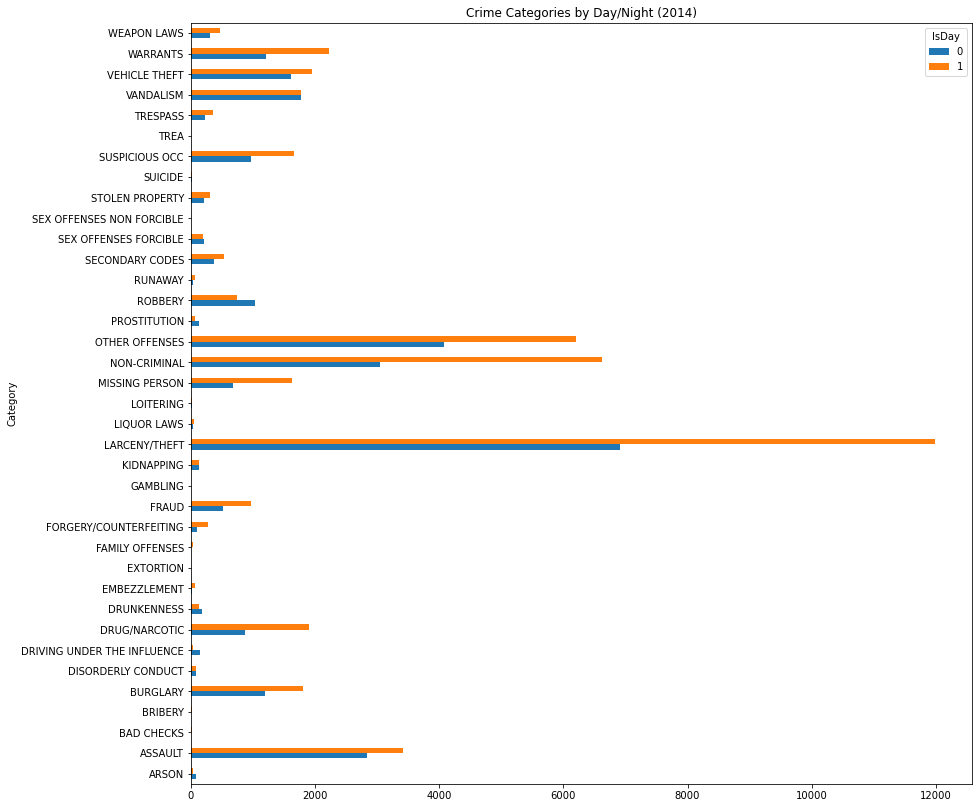

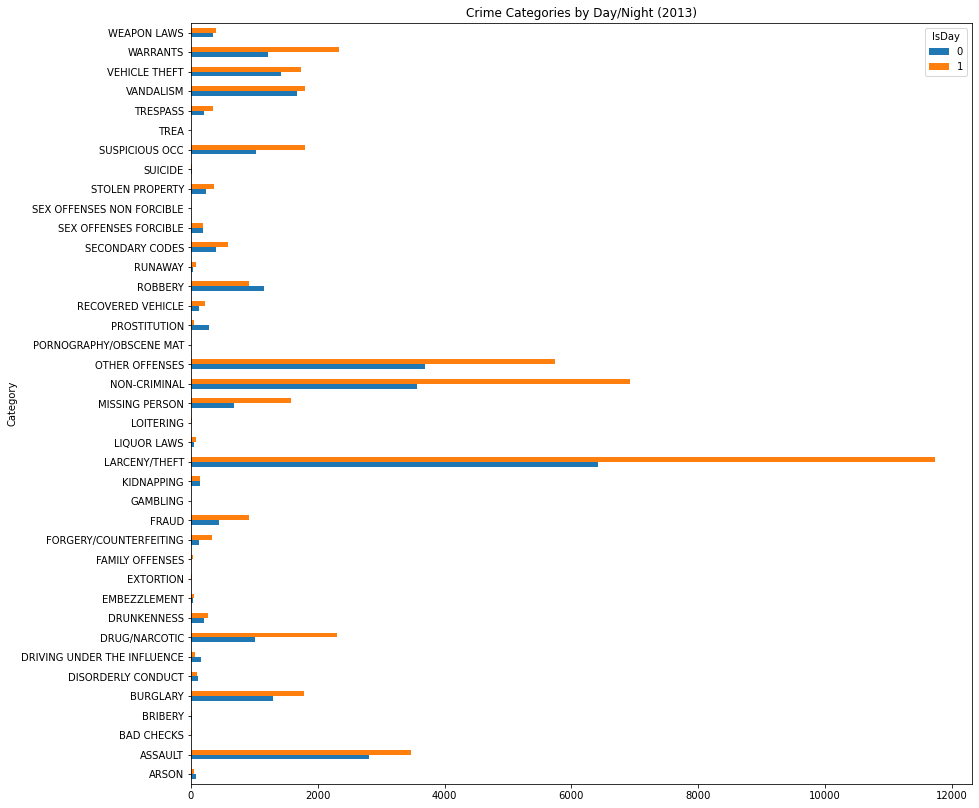

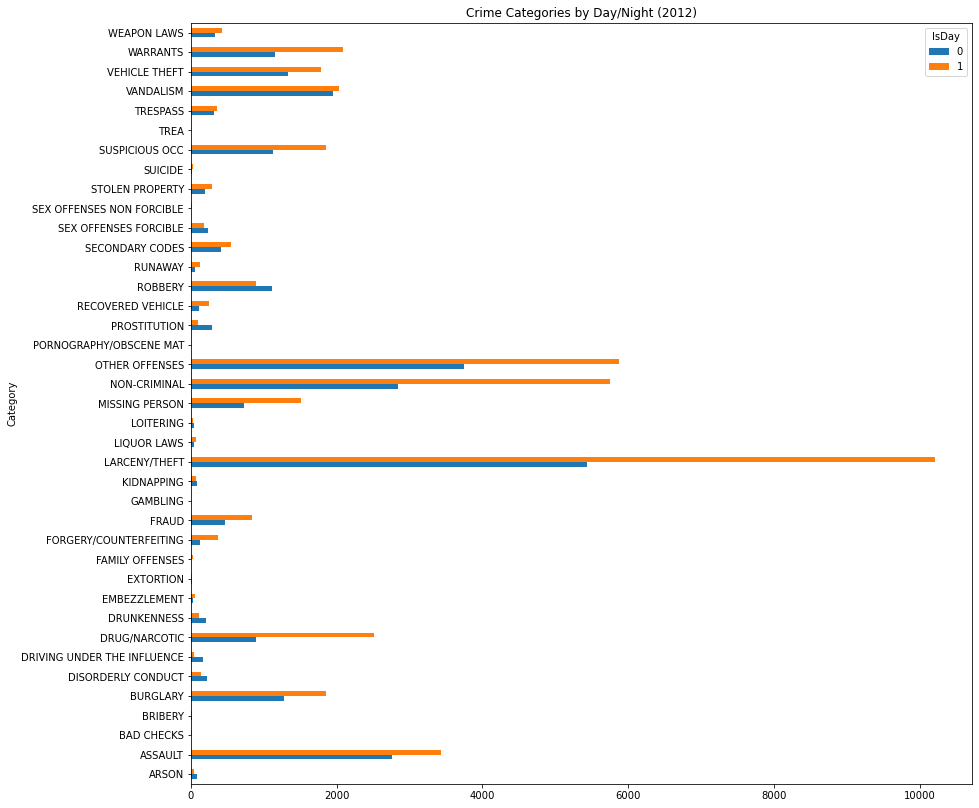

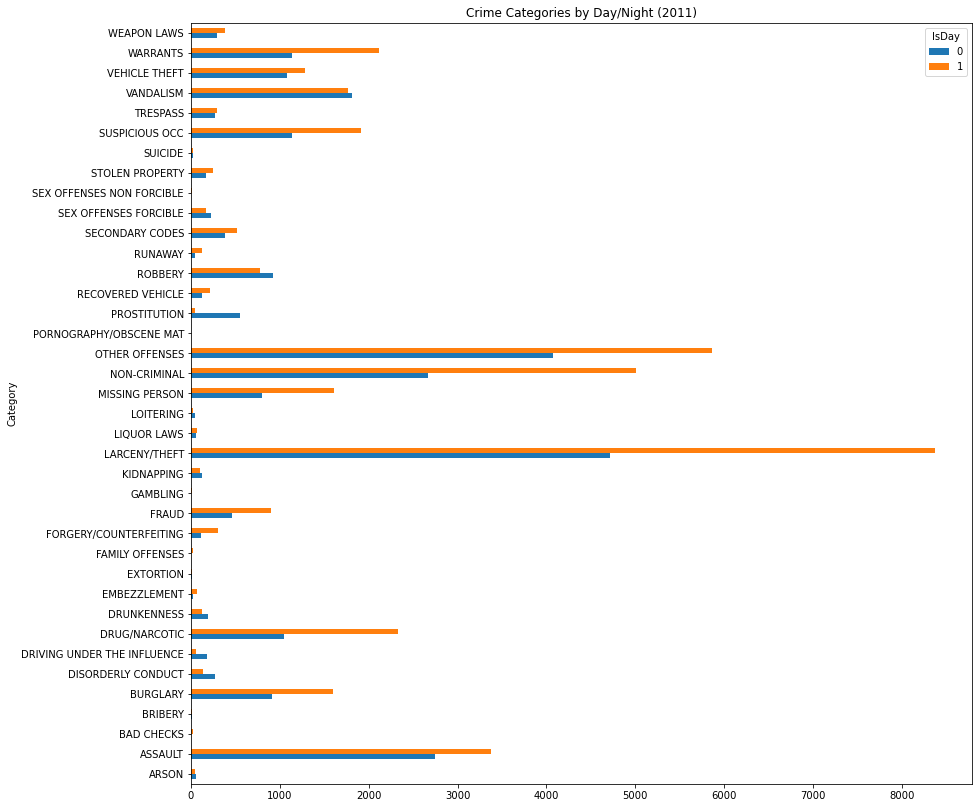

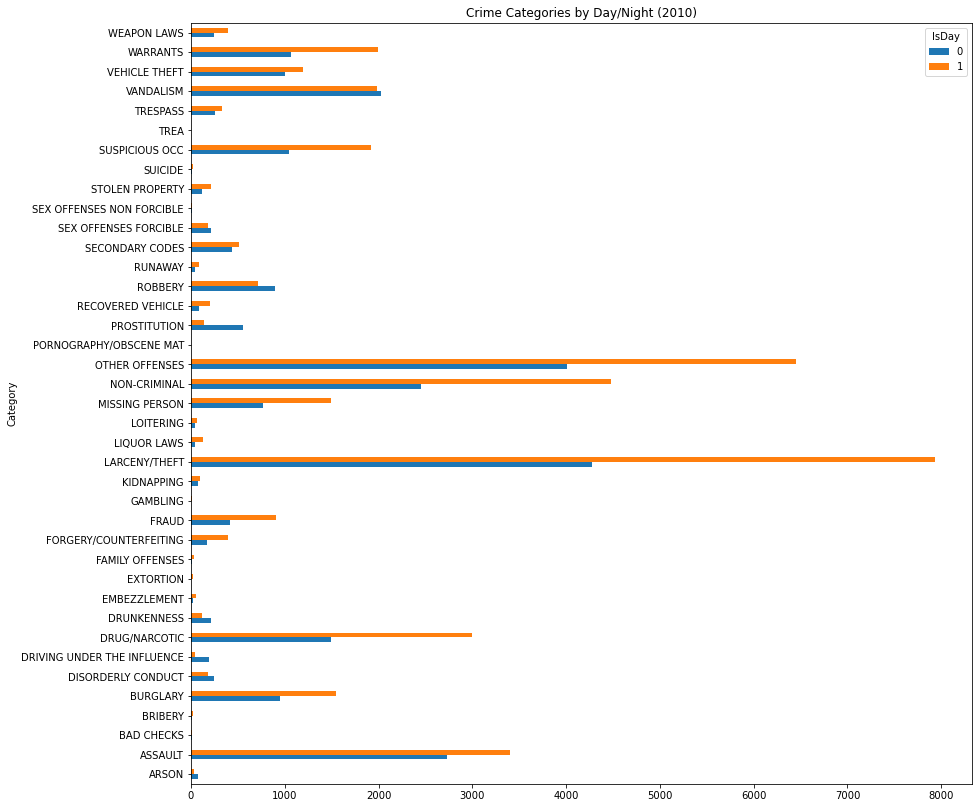

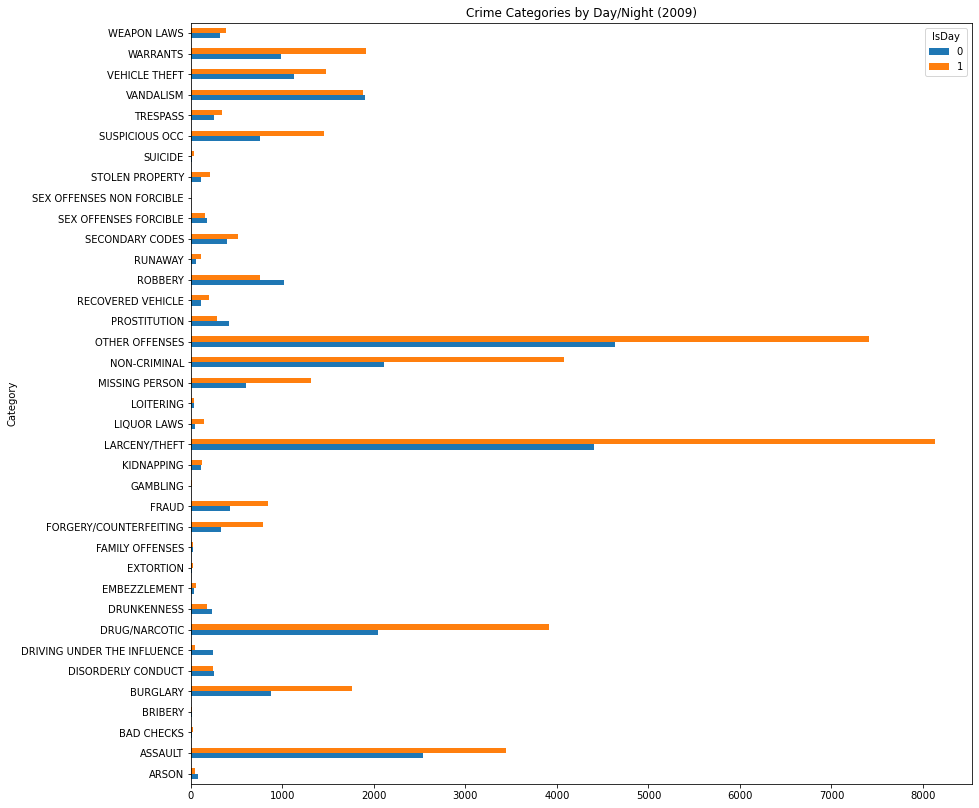

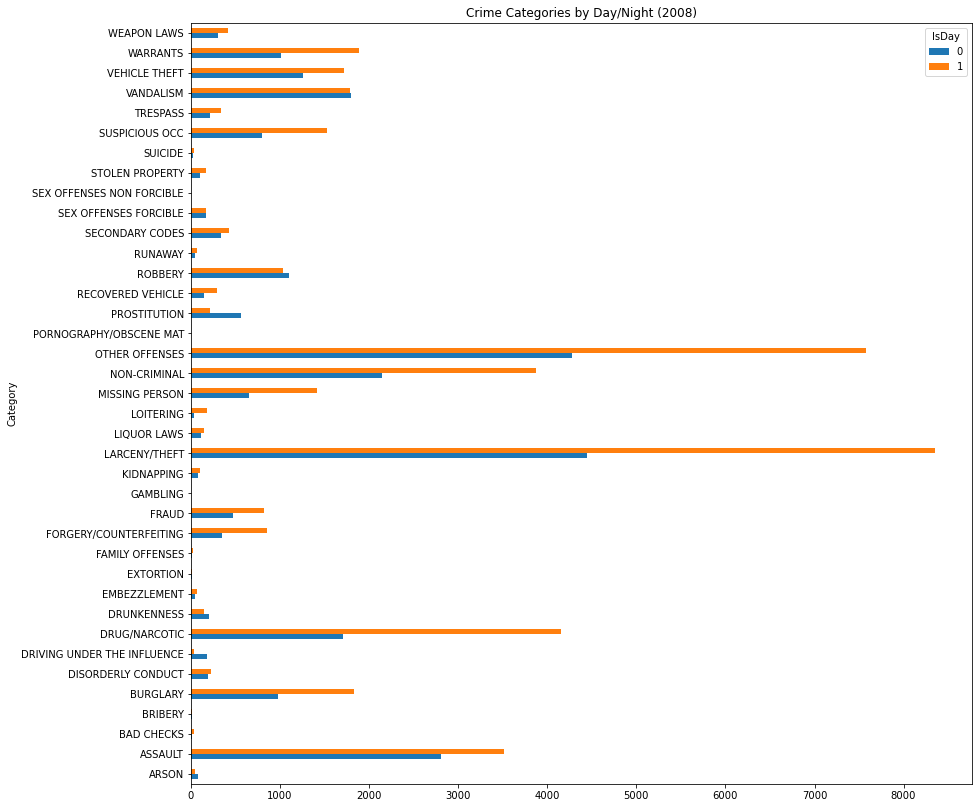

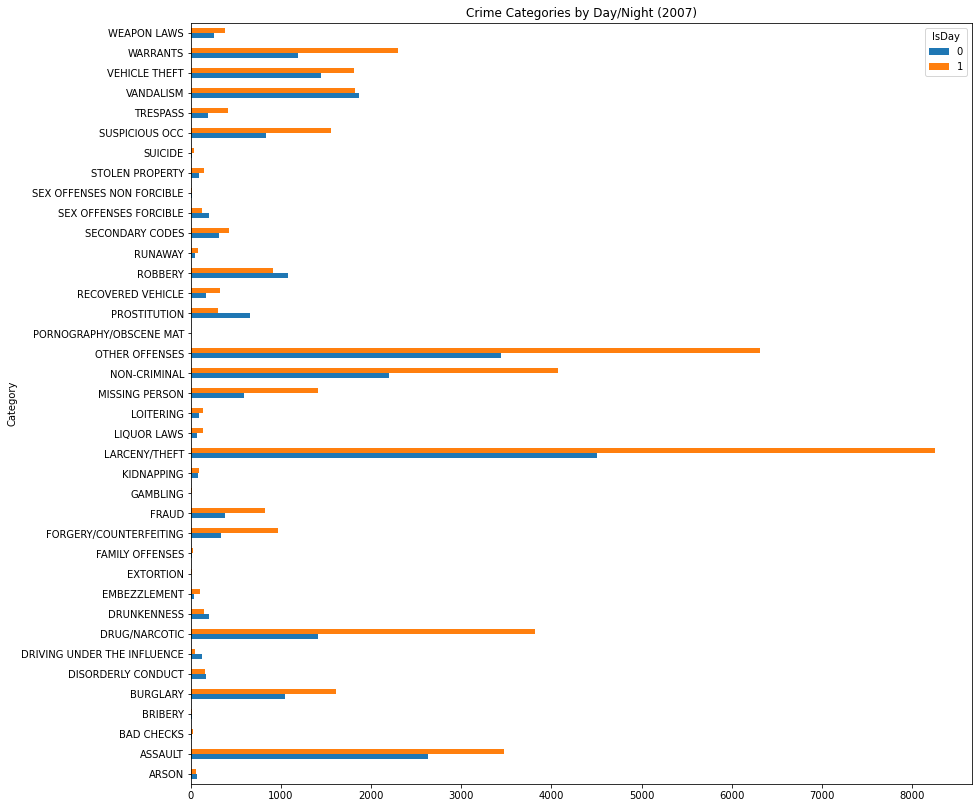

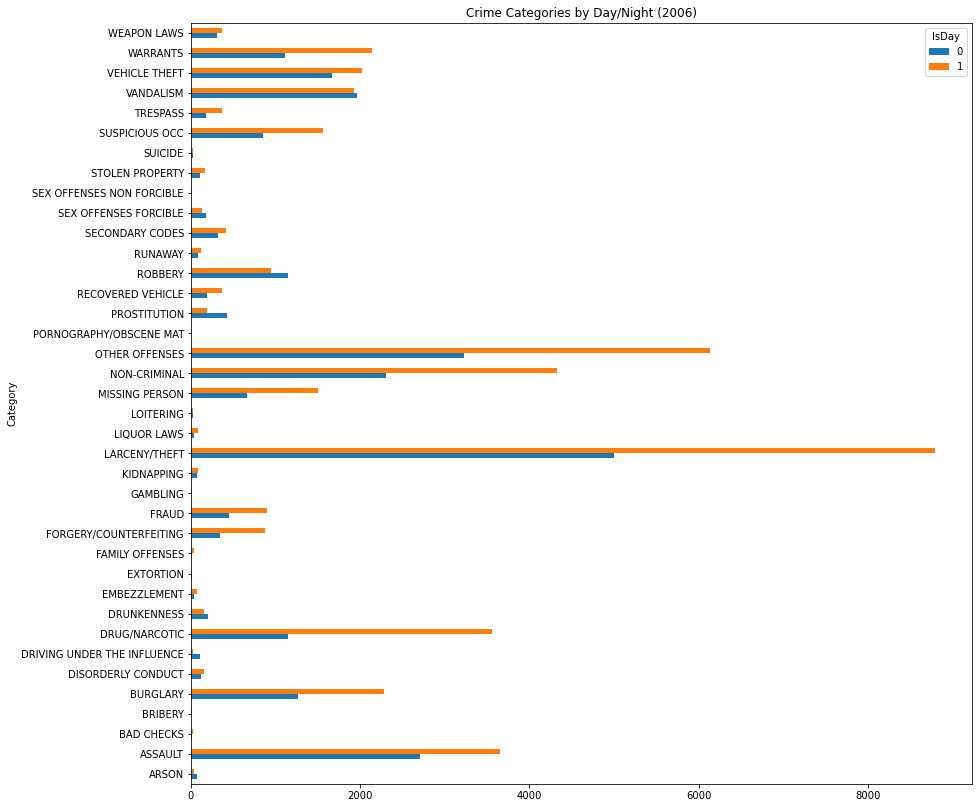

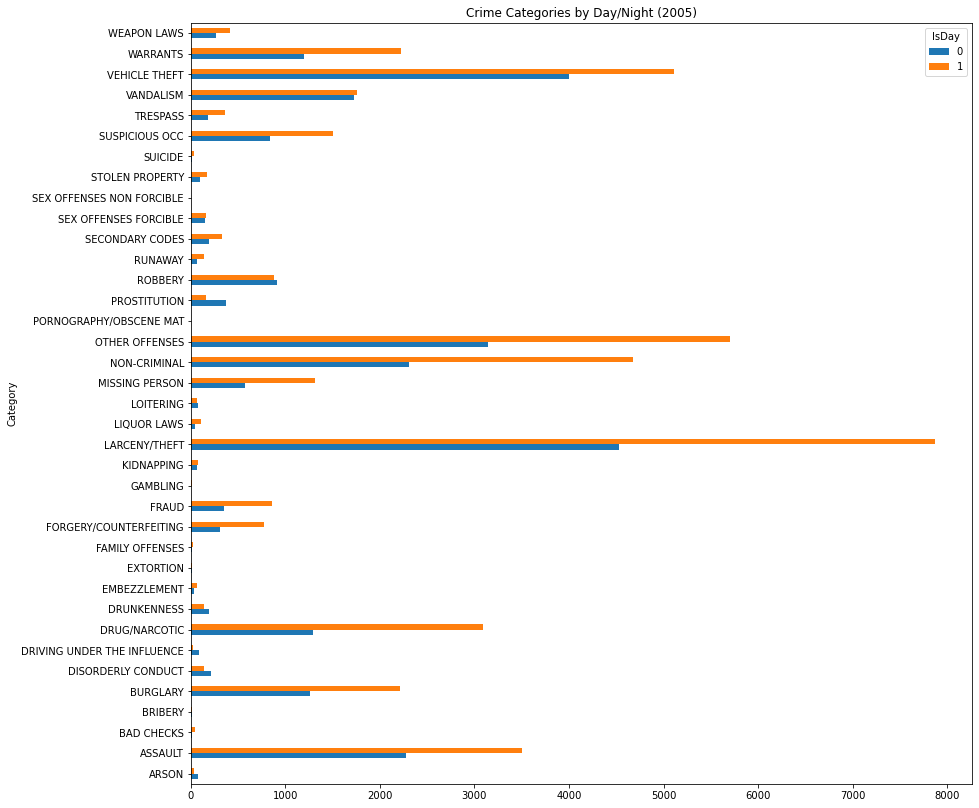

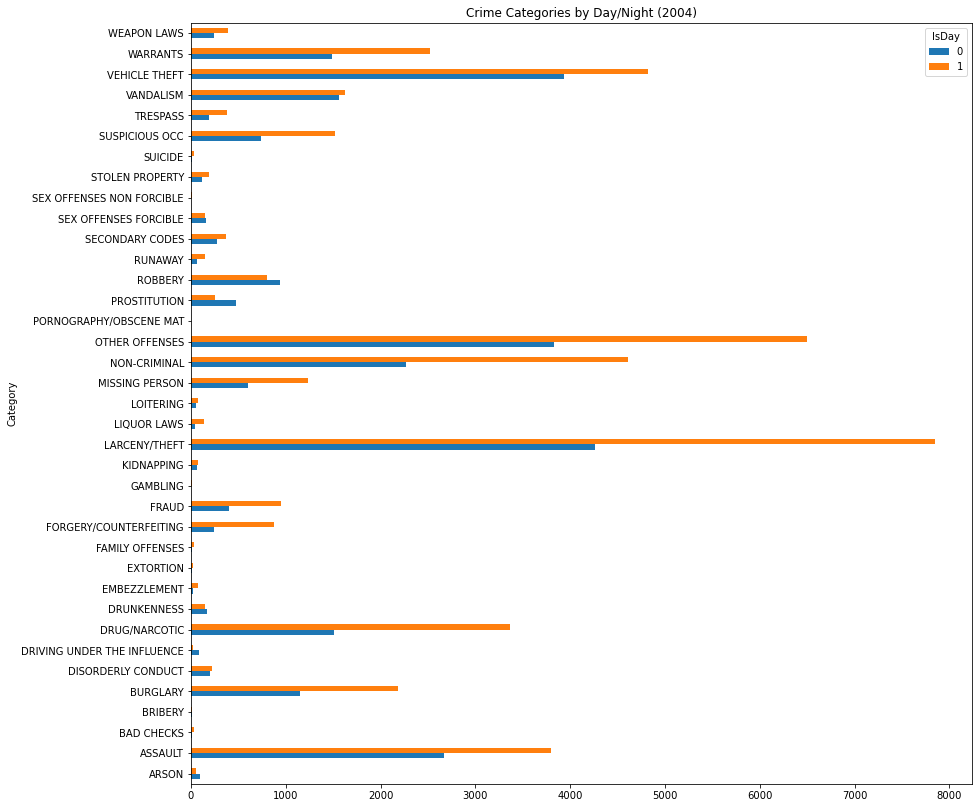

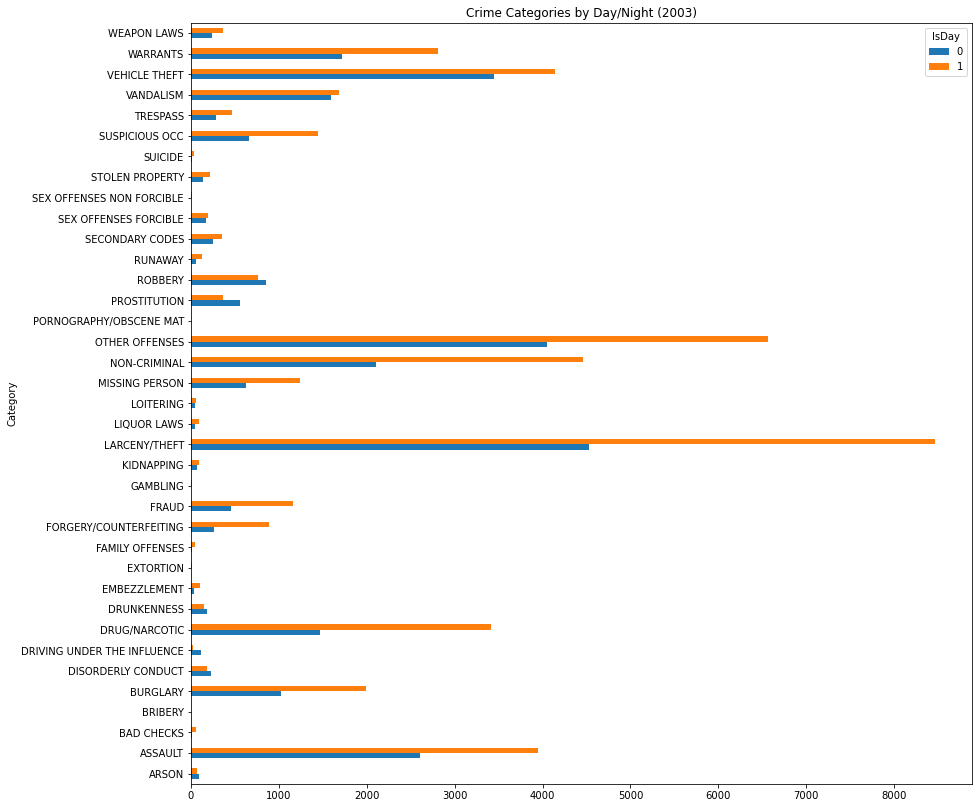

In [38]:
for y in years:
    ct = pd.crosstab(train_df[train_df.Year == y].Category, train_df[train_df.Year == y].IsDay)
    ct.plot(kind='barh', figsize=(14,14), title=f'Crime Categories by Day/Night ({y})')
    plt.show()

In [39]:
# districts = train_df.PdDistrict.unique()
# districts, len(districts)

In [40]:
# train_df = pd.get_dummies(train_df, columns=['Category'])
# train_df.columns

In [41]:
# as_per_pdDis = train_df.groupby('PdDistrict')['Descript'].count().sort_values()
# as_per_pdDis.plot(kind='barh', figsize=(10,10), title='Crime Counts (from all categories) per PdDistrict ( 2003 ~ mid 2015)')

In [42]:
# cats = train_df.Category.unique()
# for c in cats:
#     gb = train_df[train_df.Category == c].groupby('PdDistrict')['Descript'].count().sort_values()
#     gb.plot(kind='barh', figsize=(10,10), title=f'Crime Counts for Category {c} per PdDistrict (2003 ~ mid 2015)')
#     plt.show()


In [43]:
# test_df['Id'] = test_df.index

In [44]:
# def engineer_dates_col(df):
#     dates_col   = df['Dates']
#     dates_col   = pd.to_datetime(dates_col)
#     df['Year']  = dates_col.dt.year
#     df['Year'] = df['Year'] - 2000
#     df['Month'] = dates_col.dt.month
#     df['Hour'] = dates_col.dt.hour
#     df['IsDay'] = dates_col.dt.hour.apply(lambda h: 1 if (h > 6 and h < 20) else 0)
#     df['HourSin'] = np.sin((df['Hour']*2*np.pi)/24)
#     df['HourCos'] = np.cos((df['Hour']*2*np.pi)/24)
#     df['MonthSin'] = np.sin((df['Month']*2*np.pi)/12)
#     df['MonthCos'] = np.cos((df['Month']*2*np.pi)/12)
#     return df


In [45]:
# def engineer_dayofweek_col(df):
#     days_int = df['DayOfWeek'].map({
#         'Monday': 1,
#         'Tuesday': 2,
#         'Wednesday': 3,
#         'Thursday': 4,
#         'Friday': 5,
#         'Saturday': 6,
#         'Sunday': 7,
#     })
#     df['DayOfWeekSin']= np.sin((days_int*2*np.pi)/7)
#     df['DayOfWeekCos']= np.cos((days_int*2*np.pi)/7)
#     return df

In [46]:
# def engineer_category_col(df):
#     le = LabelEncoder()
#     df['Category'] = pd.Series(le.fit_transform(df['Category']))
#     return df

In [47]:
# def engineer_pddistrict_col(df):
#     #le = LabelEncoder()
#     #df['PdDistrict'] = pd.Series(le.fit_transform(df['PdDistrict']))
#     return pd.get_dummies(df, columns=['PdDistrict'])

In [48]:
# def engineer_all_cols(df, encode_category=False):
#     df = engineer_dates_col(df)
#     df = engineer_dayofweek_col(df)
#     df = engineer_pddistrict_col(df)
#     if encode_category:
#         df = engineer_category_col(df)
#     return df

In [49]:
# train_df = engineer_all_cols(train_df, encode_category=True)
# test_df  = engineer_all_cols(test_df)

In [50]:
# train_df.head()

In [51]:
# test_df.head()

In [52]:
# from sklearn.preprocessing import LabelEncoder

# cat_le = LabelEncoder()
# train_df['CategoryInt'] = pd.Series(cat_le.fit_transform(train_df.Category))
# train_df.sample(5)

In [53]:
# train_df['InIntersection'] = 1
# train_df.loc[train_df.Address.str.contains('Block'), 'InIntersection'] = 0

# test_df['InIntersection'] = 1
# test_df.loc[test_df.Address.str.contains('Block'), 'InIntersection'] = 0

In [54]:
# train_df.columns

In [55]:
# feature_cols = ['X', 'Y', 'IsDay', 'DayOfWeek', 'Month', 'Hour', 'Year', 'InIntersection',
#                 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
#                 'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
#                 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']
# target_col = 'CategoryInt'

# train_x = train_df[feature_cols]
# train_y = train_df[target_col]

# test_ids = test_df['Id']
# test_x = test_df[feature_cols]

In [56]:
type(train_x), type(train_y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [57]:
import xgboost as xgb
train_xgb = xgb.DMatrix(train_x, label=train_y)
test_xgb  = xgb.DMatrix(test_x)

In [58]:
params = {
    'max_depth': 4,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 39,
}

In [59]:
CROSS_VAL = False
if CROSS_VAL:
    print('Doing Cross-validation ...')
    cv = xgb.cv(params, train_xgb, nfold=3, early_stopping_rounds=10, metrics='mlogloss', verbose_eval=True)
    cv

In [60]:
SUBMIT = not CROSS_VAL
if SUBMIT:
    print('Fitting Model ...')
    m = xgb.train(params, train_xgb, 10)
    res = m.predict(test_xgb)
    cols = ['Id'] + cat_le.classes_
    submission = pd.DataFrame(res, columns=cat_le.classes_)
    submission.insert(0, 'Id', test_ids)
    submission.to_csv('sampleSubmission.csv', index=False)
    print('Done Outputing !')
    print(submission.sample(3))
else:
    print('NOT SUBMITING')

Fitting Model ...
[21:43:22] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:43:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Done Outputing !
            Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  \
653526  653526  0.005672  0.047222     0.00537  0.005423  0.005866   
617336  617336  0.005809  0.053448     0.00550  0.005553  0.006007   
486292  486292  0.005249  0.048973     0.00497  0.005018  0.005428   

        DISORDERLY CONDUCT  DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  \
653526            0.007254     